# **2.3 Task Random Forest -ClimateWins -NK**

## Table of Contents:

#### **1. Importing Libraries and Data**
- X -> Weather observations (DATASET weather_prediction_dataset_processed.csv) - need date colum
- y -> Pleasant weather presdictions (Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv) -need date column
#### **2. **Data Wrangling**
-  pre-processing data set -
   * a)  **Filter both datasets for 2010s - for Random Forest 1**
     * reshape, remodel, split data
   * b)  **Filter both datasets for 2000s - for Random Forest 2**
     * reshape, remodel, split data
#### **3. Random Forest Models**
* a) Random Forest 1 for 2010s
* b)Random Forest 2 for 2000s
#### **4.  Uncovering Feature Importances**
* a) for 2010s data
* b) for 2000s data
#### **5. Modeling the top three most influencial weather sations in order of importance for all years**
* a) Madrid
* b) Budapest
* c) Ljubljana c

## 1. **Importing Libraries and Data**

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# path = r'/Users/yourname/Datasets'
path = r'/Users/nancykray/Desktop/CF/Machine Learning /ClimateWins/Data Sets'


In [5]:
# Import X unscaled weather observations data (unscaled)
# Import y predictions data (answers) 
unscaled = pd.read_csv(os.path.join(path, 'DATASET weather_prediction_dataset_processed.csv'), index_col = False)
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)


In [6]:
unscaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [7]:
unscaled.shape

(22950, 170)

In [8]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [9]:
answers.shape

(22950, 16)

## 2. **Data Wrangling**

In [10]:
# b) Drop 3 weather stations: all columns related to Tours, Gdansk and Rome from the unscaled dataset

unscaled = unscaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [11]:
unscaled.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=149)

In [12]:
# c) Drop columns that end with 'wind_speed' and 'snow_depth'

columns_to_drop = unscaled.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
       'KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed',
       'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed',
       'OSLO_snow_depth', 'SONNBLICK_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [13]:
# c)
unscaled = unscaled.drop(columns=columns_to_drop)

In [14]:
unscaled.shape  # still has date and month column 

(22950, 134)

In [15]:
# Add three new columns cloud_cover, pressure and humidity for three locations and copy the values from the closest weather stations
unscaled[['KASSEL_cloud_cover', 'MUNCHENB_pressue', 'STOCKHOLM_humidity']]=unscaled[['LJUBLJANA_cloud_cover', 'SONNBLICK_pressure', 'OSLO_humidity']].copy()

In [16]:
unscaled.shape #(I can take out month and date after I separate by decade to get back to 135)

(22950, 137)

### Preprocessing for Random Forest 1- separate into decades

## a) **2010s unscaled weather observations (x) and predictions/answers (y)**

In [17]:
# Filter weather dataset to 2010s
unscaled_2010s = unscaled[unscaled['DATE'].astype(str).str.startswith('201')] 
unscaled_2010s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
18263               -0.5                5.0             0.93           0.9981   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
18263                     0.12                   0.2              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
18263              -2.6             -3.0             -1.8   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
18263                      8                0.97              0.9926   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
18263                        0.12                     0.46   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
18263                 0.0                  6.9                 5.5   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
18263                 7.7                       7                 0.91   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82           1.0107         

In [18]:
unscaled_2010s.shape

(3652, 137)

In [19]:
# now drop the date and month for 2010s weather dataset (unscaled_2010s) ->X
unscaled_2010s = unscaled_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
unscaled_2010s.shape

(3652, 135)

In [20]:
# now do the same for other y dataset (pleasant weather answers)
# filter answers to 2010s

answers_2010s = answers[answers['DATE'].astype(str).str.startswith('201')] 
answers_2010s.head(1)


DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [21]:
# now drop 'DATE' column
answers_2010s = answers_2010s.drop(columns=['DATE'])

# Check shape
answers_2010s.shape

(3652, 15)

### **CREATE MATRICES**
### Create **y** matrix - COMBINE 15 colums into only 1

In [22]:
# Create y matrix -- combine 15 columns in pleasant weather data into single column
y_1 = answers_2010s.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [23]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [24]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [25]:
# Check shape
y_1.shape

(3652,)

### Create **X** matrix

In [26]:
# Create X matrix
X_1 = unscaled_2010s.to_numpy()

In [27]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


### SPLIT data into training and testing sets

In [28]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [29]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


### **Preprocessing for Random Forest 2- separate into decades**

## **2000s unscaled weather observations (x) and predictions/answers (y)**

In [30]:
# Filter weather dataset to 2000s
unscaled_2000s = unscaled[unscaled['DATE'].astype(str).str.startswith('200')] 
unscaled_2000s.head(1)


DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                     0.2                 0.03             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                     0.0                0.0                -2.5   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
14610               -3.2               -0.4                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
14610               0.92             1.0268                       0.52   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
14610                     0.0                3.7                -4.9   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
14610               -8.4               -0.7                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
14610             0.97            1.024                     0.14   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
14610                   0.1              0.0               6.1   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
14610              3.5              8.1                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
14610                 0.92                1.024                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
14610                      0.22                  0.0                   4.2   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
14610                  2.5                  6.9                     7   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
14610               0.94             1.0245                       0.18   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
14610                     0.0                0.4                 7.0   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
14610                4.9               10.8             0.93           1.0237   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
14610                     0.12                  0.13              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
14610               3.5              1.5              5.0   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
14610                      6                0.83              1.0294   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
14610                        0.57                      0.0   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
14610                 5.2                 -4.8                -9.1   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
14610                -1.3                       8                 0.98   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
14610               1.0251                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
14610                      0.17                  0.0                   5.6   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
14610                  4.1                  6.9                   1   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
14610              0.8           1.0282         

In [31]:
# Check shape
unscaled_2000s.shape

(3653, 137)

In [32]:
# Filter pleasant dataset to 2000s
answers_2000s = answers[answers['DATE'].astype(str).str.startswith('200')] 
answers_2000s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0

In [33]:
# check shape
answers_2000s.shape

(3653, 16)

In [34]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset 
unscaled_2000s = unscaled_2000s.drop(columns=['DATE', 'MONTH'])

# Check shape
unscaled_2000s.shape

(3653, 135)

In [35]:
# Drop 'DATE' column from 2000s pleasant dataset
answers_2000s = answers_2000s.drop(columns=['DATE'])

# Check shape
answers_2000s.shape

(3653, 15)

### **CREATE MATRICES**
### Create **y** matrix - COMBINE 15 colums into only 1

In [36]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = answers_2000s.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [37]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [38]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [39]:
# Check shape
y_2.shape

(3653,)

### Create **X** matrix

In [40]:
# Create X matrix
X_2 = unscaled_2000s.to_numpy()

In [41]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3653, 135)
(3653,)


## Split data into training and testing sets

In [42]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [43]:
# Check shapes of split datasets
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## **3. Creating Random Forests**

### a) **Random Forest 1 for 2010s**

In [44]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [45]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9737130339539978


In [46]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


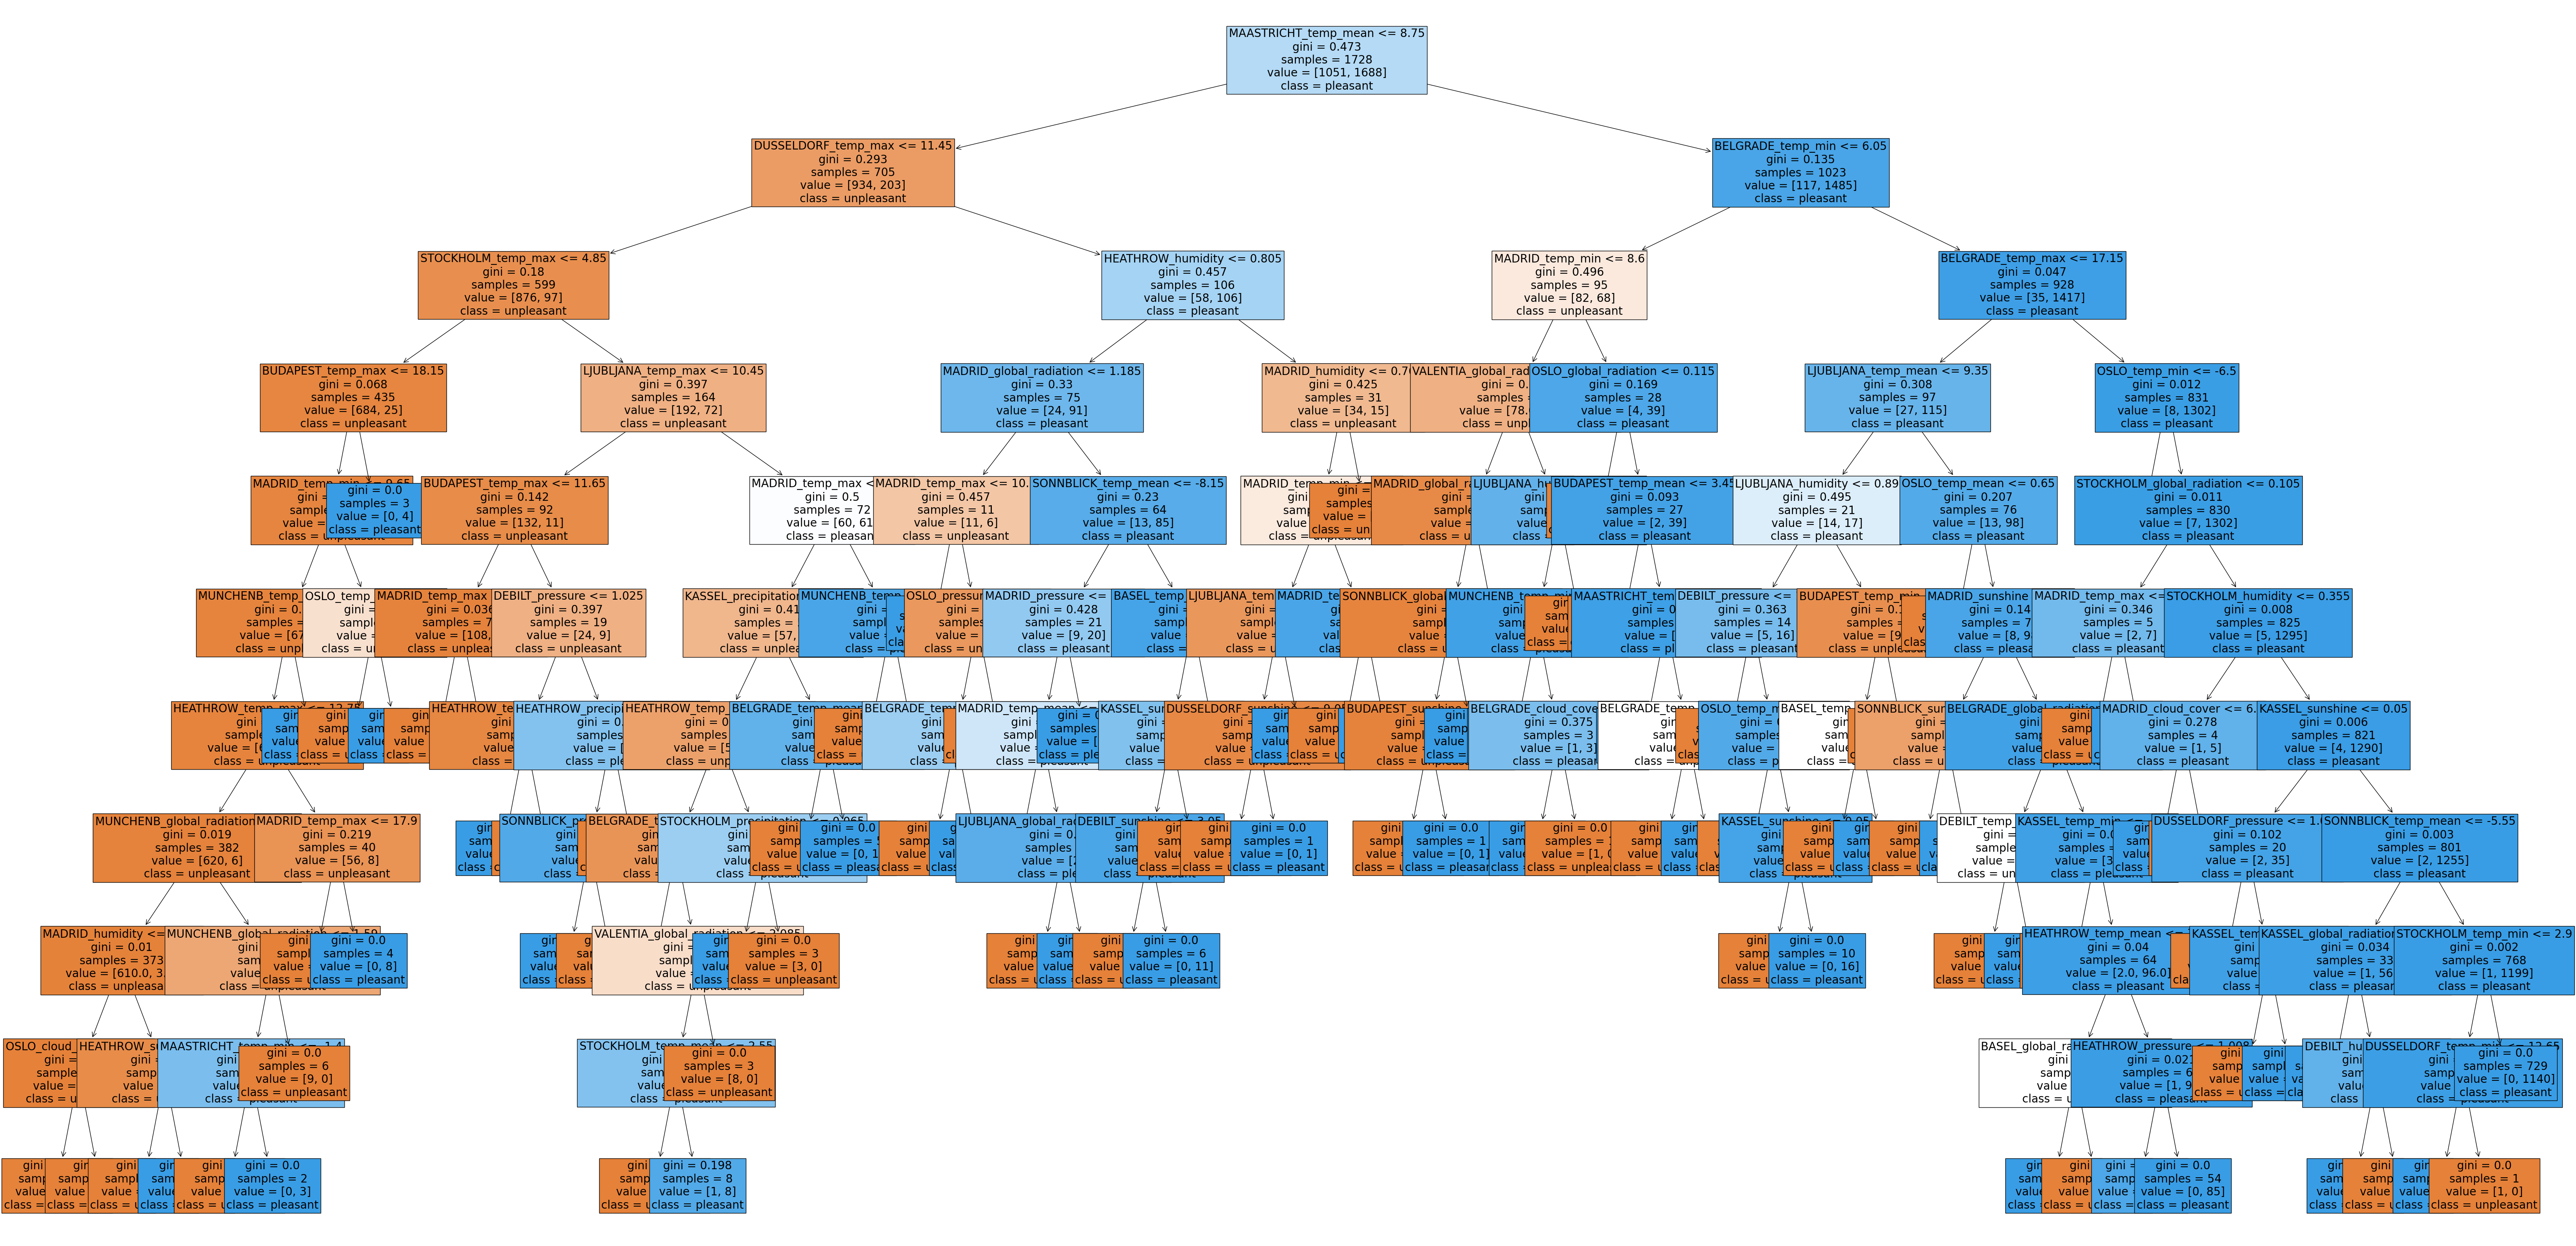

In [57]:
# Plot random forest (2010s)
fig_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=unscaled_2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();
fig_1.savefig(f"{path}/random_forest_2010s.png")

### **b) Random Forest 2 (2000s Data)**

In [59]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [60]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.962800875273523


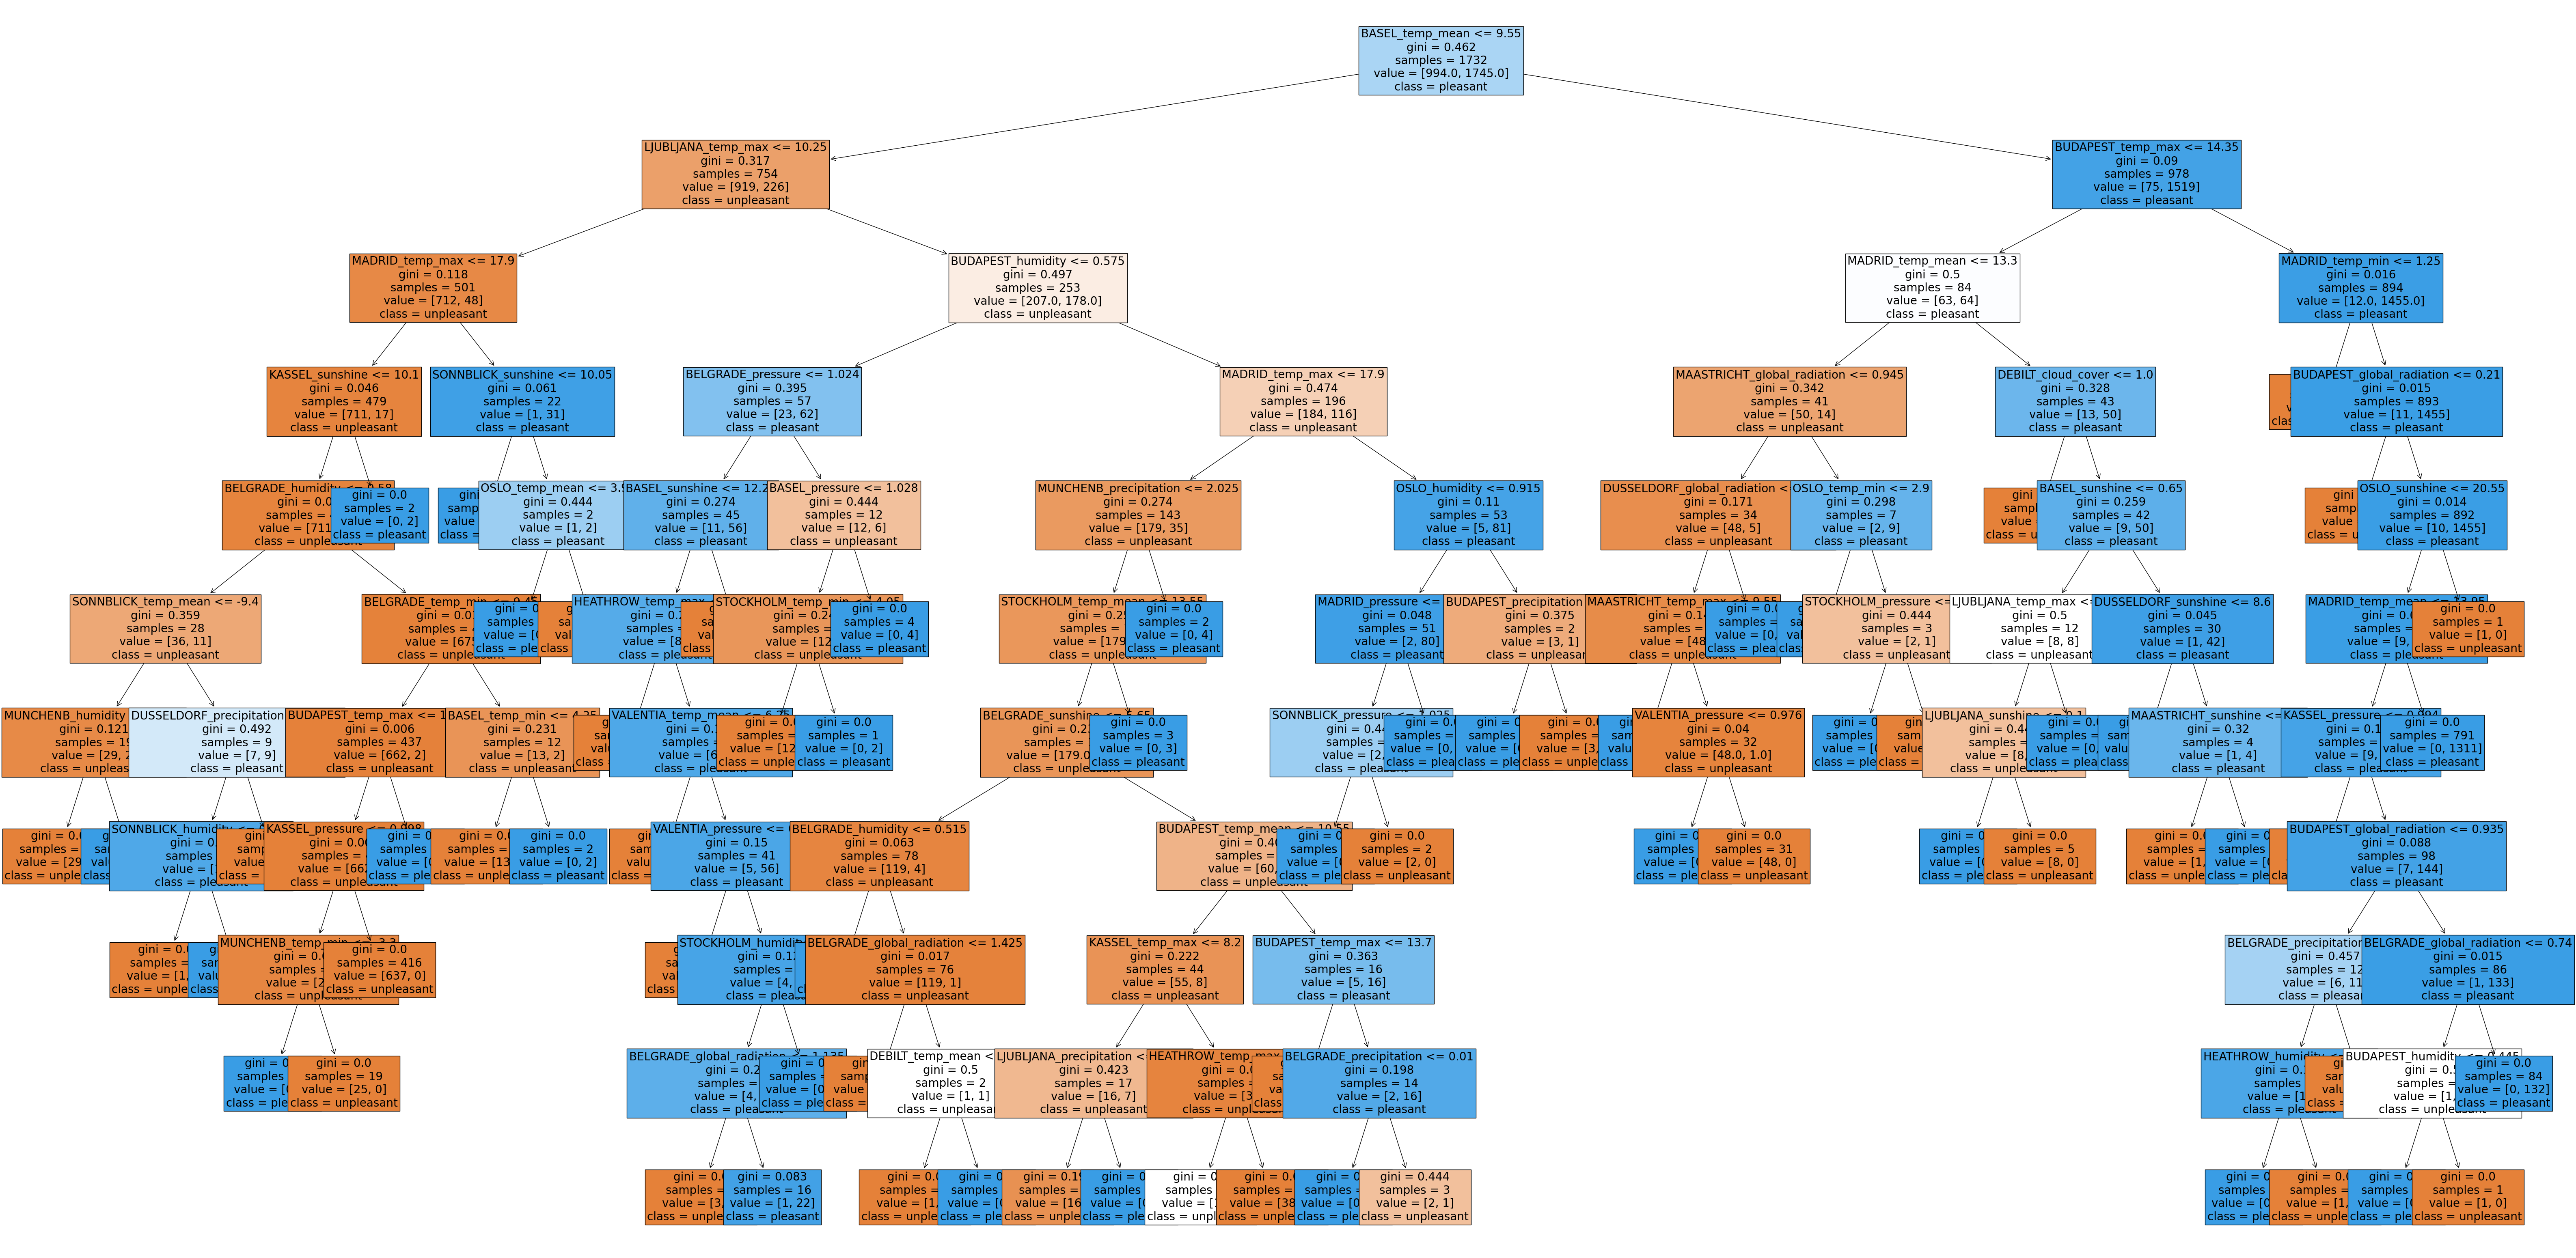

In [62]:
# Plot random forest (2010s)
fig_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=unscaled_2000s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();
fig_2.savefig(f"{path}/random_forest_2000s.png")

## **4. Uncovering Feature Importance**

### a) for 2010s data

In [63]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [4.82996663e-04 1.18843468e-03 1.44190631e-03 2.11126642e-03
 4.53581610e-04 7.23195651e-04 3.55610633e-02 7.24613771e-03
 2.66565091e-02 6.81220156e-04 2.02613359e-03 2.15134506e-03
 1.01615162e-03 2.36647103e-03 1.26849340e-03 1.40353587e-02
 3.85177861e-03 2.19584702e-02 3.67195236e-04 0.00000000e+00
 0.00000000e+00 8.33046343e-04 8.46847655e-04 8.93408412e-04
 5.04326355e-02 9.32389617e-03 3.57253810e-02 4.43917033e-04
 7.55237167e-04 1.01806467e-03 2.22857578e-03 8.29510896e-04
 1.11145151e-03 8.57109368e-03 1.23285168e-03 3.29294652e-02
 2.64926237e-04 9.98853416e-04 1.24140484e-03 3.90361417e-03
 5.64959126e-04 9.21236553e-04 1.50542409e-02 1.50828014e-03
 2.76408984e-02 3.96061875e-04 1.10736623e-03 1.19125037e-03
 5.38122771e-03 5.16559210e-04 1.52486070e-03 1.49580739e-02
 1.08590359e-03 2.45688749e-02 5.07977728e-04 8.64243967e-04
 7.21844533e-04 3.39169172e-04 6.28165004e-04 6.80395632e-04
 7.10806338e-04 9.17815256e-04 6.51570996e-04 2.17622930e-03
 1.

### Reshape the feature importance to (-1, 15, 9)

In [65]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


#### Collapse this shape into one observation for each weather station by using np.sum(important[0], axis=1) 

In [66]:
# Collapse this shape into one observation for each weather station by using np.sum(important[0], axis=1) 
# sum the values across the last dimention to get single observation per weather station

collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.07586509 0.04935542 0.09842241 0.04912017 0.05209841 0.05073018
 0.00602199 0.13453678 0.02970887 0.23153851 0.10944677 0.05491692
 0.0149712  0.03621515 0.00705212]


In [67]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [68]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_unscaled = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [69]:
# Sort by importance for chart readability
collapsed_importances_unscaled = collapsed_importances_unscaled.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_unscaled)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.231539
7        LJUBLJANA    0.134537
10        MUNCHENB    0.109447
2         BUDAPEST    0.098422
0            BASEL    0.075865
11            OSLO    0.054917
4       DUSSELDORF    0.052098
5         HEATHROW    0.050730
1         BELGRADE    0.049355
3           DEBILT    0.049120
13       STOCKHOLM    0.036215
8       MAASTRICHT    0.029709
12       SONNBLICK    0.014971
14        VALENTIA    0.007052
6           KASSEL    0.006022


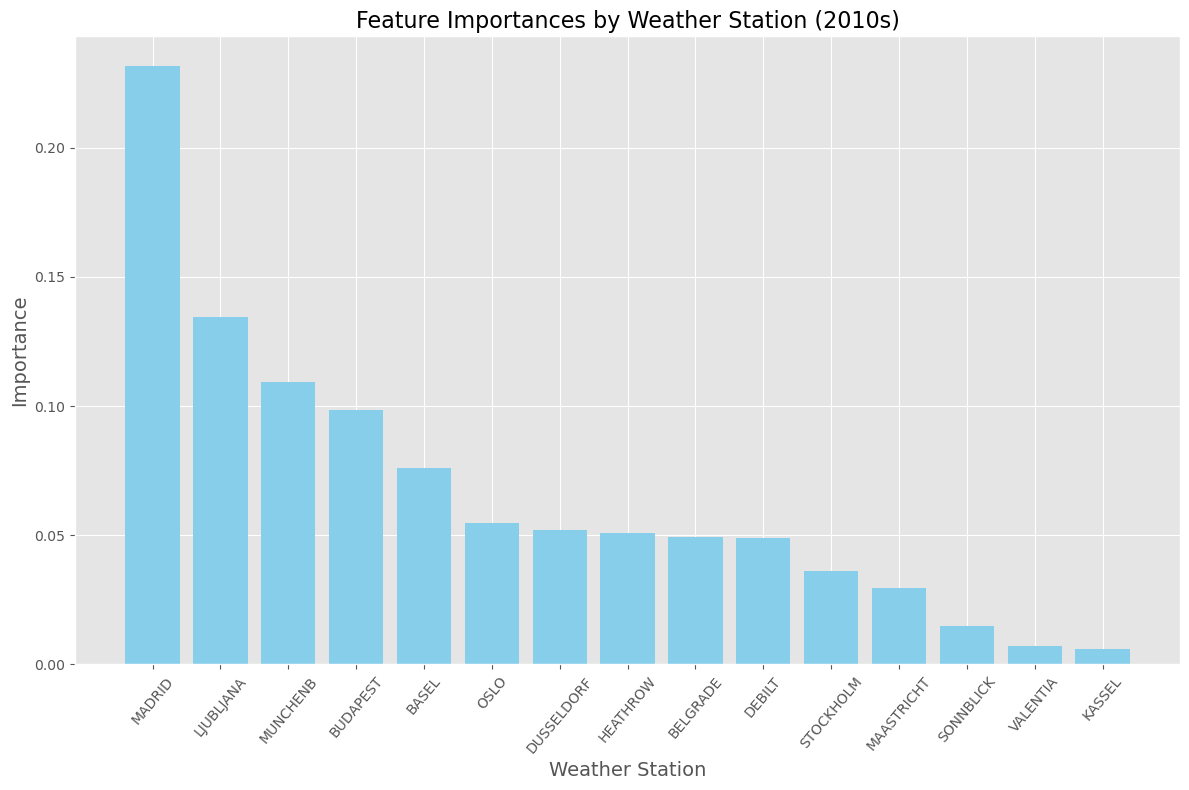

In [73]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_unscaled['Weather Station'], collapsed_importances_unscaled['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show() 
plt_1.savefig(f"{path}/feature_importance_bar_2010s.png")

### b) for 2000s data

In [75]:
# Retrieve feature importances from the trained model

feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.0007238  0.00092177 0.00132483 0.00211043 0.0007917  0.00091913
 0.03433246 0.00663744 0.03446301 0.00107529 0.00392928 0.00121508
 0.00704682 0.00197739 0.00252967 0.0227346  0.00384908 0.02460032
 0.00032262 0.00123275 0.00171923 0.01062439 0.00114567 0.00184769
 0.08083729 0.01756071 0.03927092 0.00042488 0.00067315 0.00119381
 0.007957   0.00054884 0.00072212 0.00715289 0.00175627 0.00430263
 0.00064285 0.00100325 0.00079589 0.0026553  0.0006139  0.000758
 0.00331542 0.0014248  0.01506092 0.0006068  0.0008645  0.00136715
 0.00627627 0.00047776 0.00088084 0.00260049 0.00266071 0.01098151
 0.00108759 0.00141684 0.00305059 0.00049923 0.00080482 0.02280605
 0.01061715 0.01550131 0.0002483  0.00157879 0.00140309 0.00296648
 0.00118688 0.00069287 0.03102808 0.01335661 0.04816545 0.00064087
 0.00082175 0.00069148 0.00152345 0.00064471 0.00086436 0.00757835
 0.0063586  0.02044689 0.0009763  0.00220341 0.00280202 0.01021271
 0.00238252 0.00300611 0.04917026 0.0276291

In [76]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [77]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.08222457 0.06895753 0.15456127 0.02473159 0.02627032 0.02671604
 0.05603189 0.10101912 0.03990588 0.24016375 0.07917479 0.03845033
 0.01812753 0.03124346 0.01242193]


In [78]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [79]:
# Sort by importance for chart readability
collapsed_importances_unscaled= collapsed_importances_unscaled.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_unscaled)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.231539
7        LJUBLJANA    0.134537
10        MUNCHENB    0.109447
2         BUDAPEST    0.098422
0            BASEL    0.075865
11            OSLO    0.054917
4       DUSSELDORF    0.052098
5         HEATHROW    0.050730
1         BELGRADE    0.049355
3           DEBILT    0.049120
13       STOCKHOLM    0.036215
8       MAASTRICHT    0.029709
12       SONNBLICK    0.014971
14        VALENTIA    0.007052
6           KASSEL    0.006022


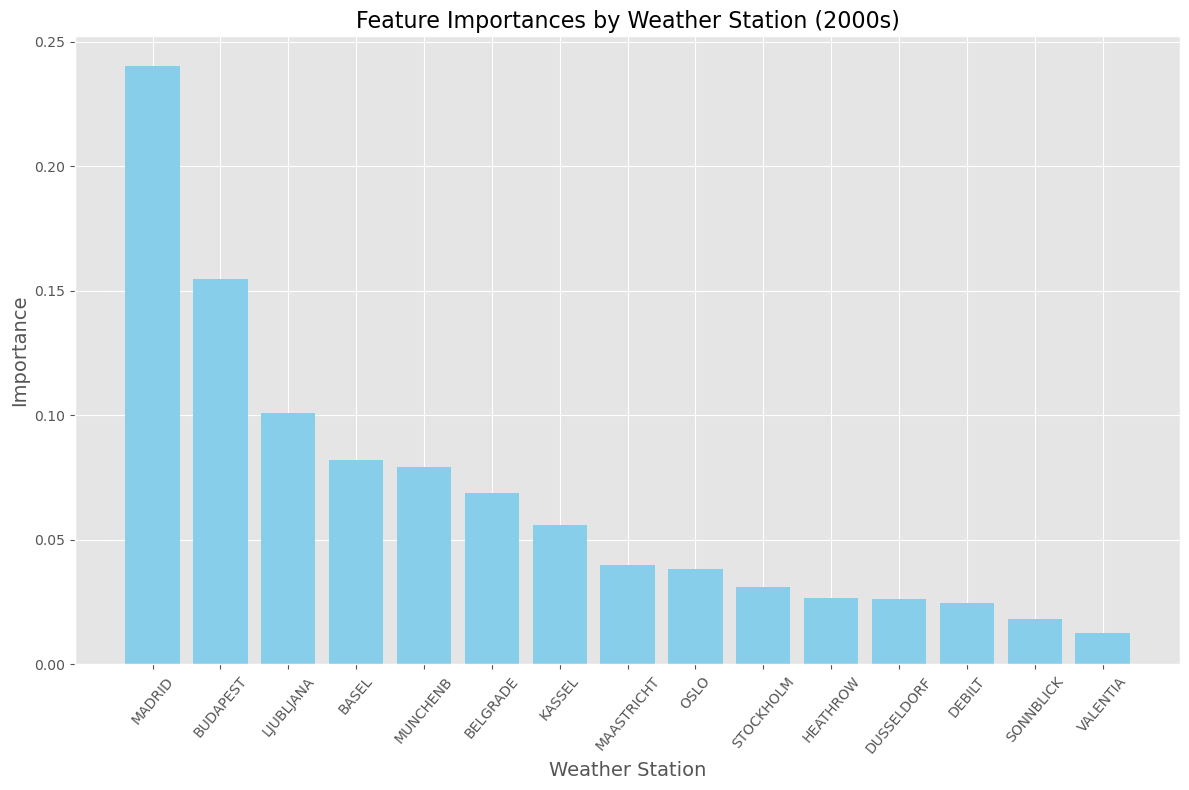

In [81]:
# Plot the importances

# Sort the DataFrame by 'Importance' in descending order
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

plt_2.savefig(f"{path}/feature_importance_bar_2000s.png")

### **5. Modeling the top three most influencial weather sations in order of importance for all years**


## **a) Madrid**

**Preprocessing the Data for Madrid**

In [82]:
# Filter weather dataset to only include Madrid
df_madrid = unscaled[unscaled.columns[unscaled.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_madrid.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [83]:
# Filter pleasant dataset to only include Madrid
madrid_answers = answers[answers.columns[answers.columns.astype(str).str.startswith('MADRID')]]

# Check output
madrid_answers.head(1)

MADRID_pleasant_weather
0                        0

In [84]:
# Check shape
print(df_madrid.shape)
print(madrid_answers.shape)

(22950, 9)
(22950, 1)


In [85]:
# Create matrices
y_3 = madrid_answers.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [86]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [87]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [88]:
# Create X matrix
X_3 = df_madrid.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [89]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Create Random Forest for Madrid**

In [90]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [91]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.996514464970373


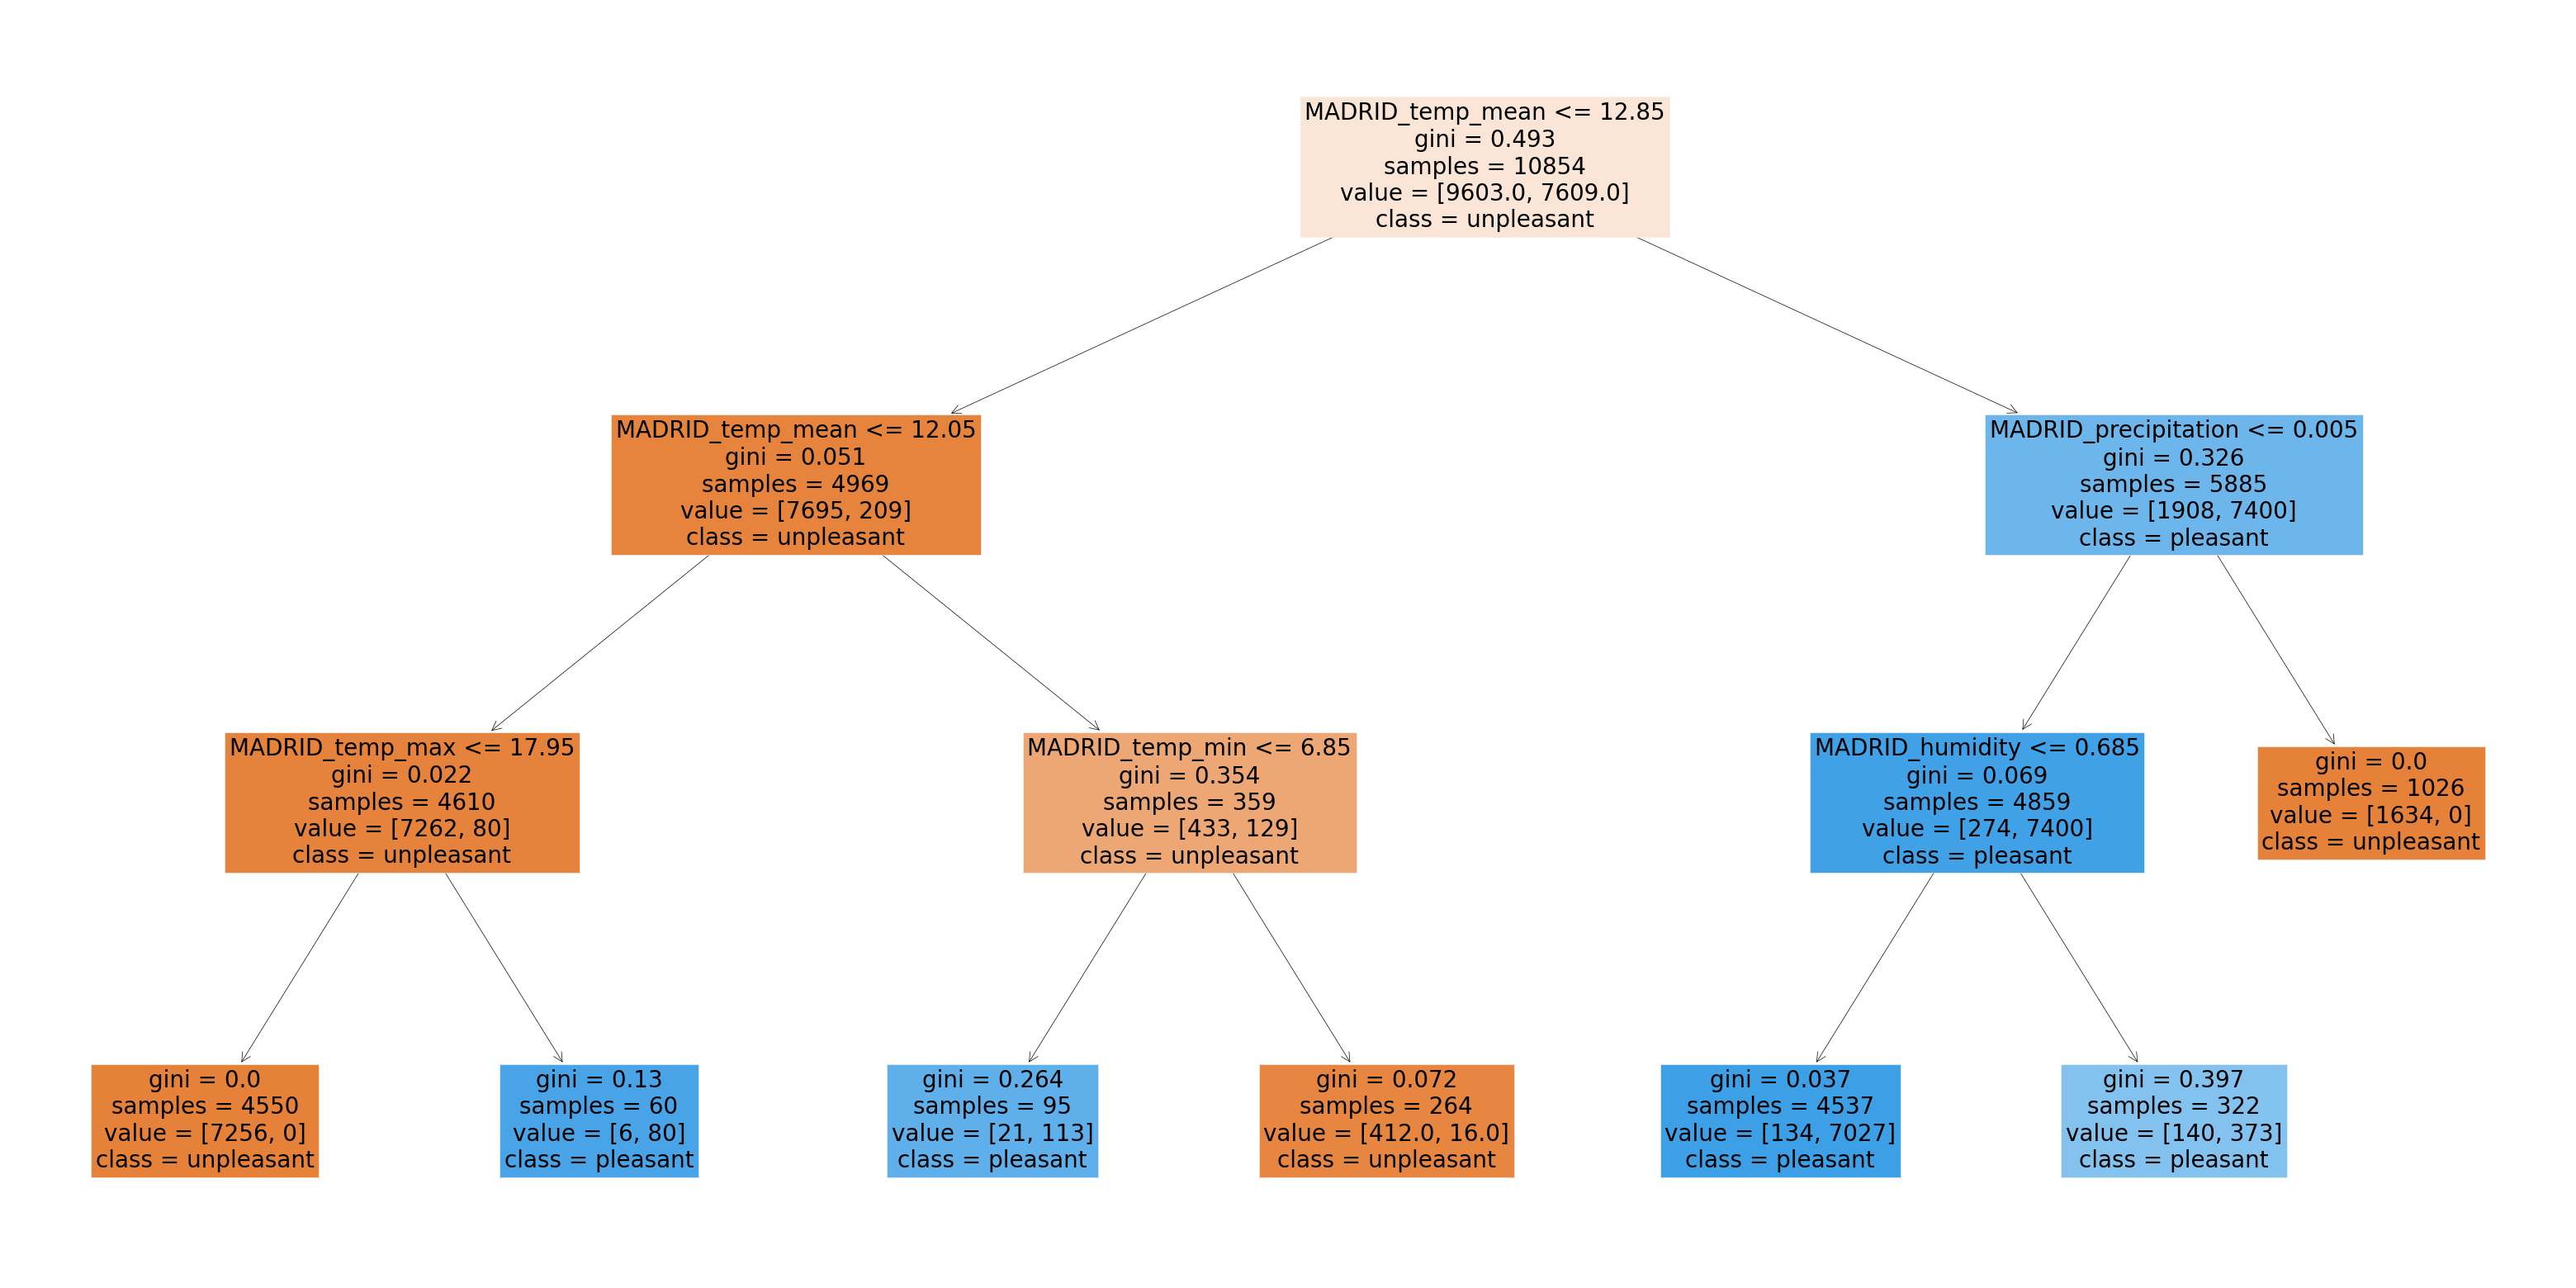

In [95]:
# Plot random forest (Madrid)
fig_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

fig_3.savefig(f"{path}/random_forest_Madrid.png")

**List Feature Importances**

In [96]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [1.73465296e-02 2.06915331e-02 3.49320489e-04 1.37149908e-01
 1.21978163e-01 5.99237899e-02 1.81340817e-01 7.10654265e-02
 3.90154513e-01]
(9,)


In [97]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [98]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [99]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.390155
6         temp_mean    0.181341
3  global_radiation    0.137150
4     precipitation    0.121978
7          temp_min    0.071065
5          sunshine    0.059924
1          humidity    0.020692
0       cloud_cover    0.017347
2          pressure    0.000349


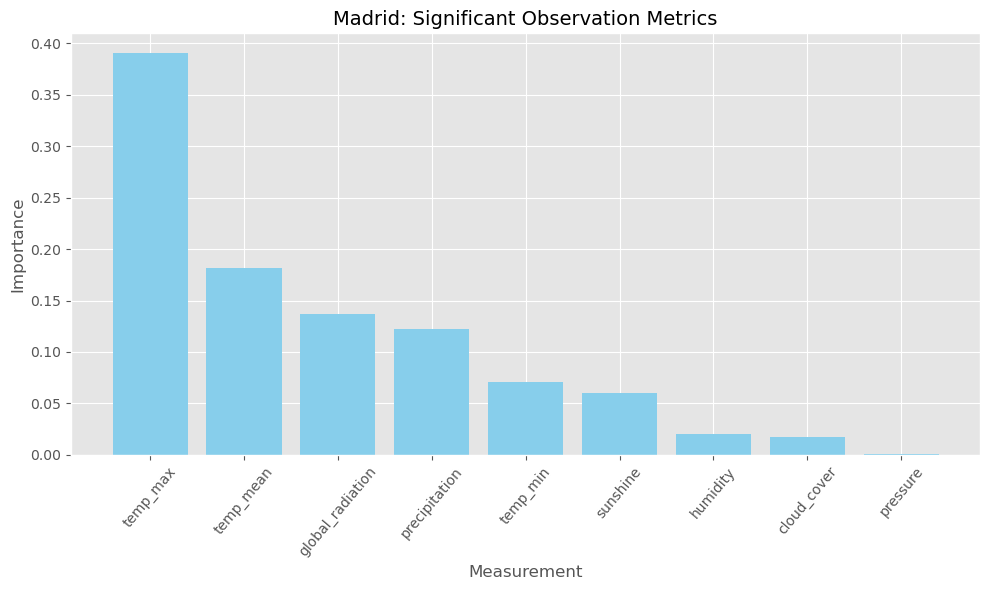

In [100]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()


plt_3.savefig(f"{path}/feature_importance_bar_Madrid.png")

#### The most important indicators for Madrid are 1) temp_max, 2)temp_mean, 3)global_radiation

## **b) Budapest**

**Preprocessing the Data for Budapest**

In [102]:
# Filter weather dataset to only include Budapest
df_budapest = unscaled[unscaled.columns[unscaled.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_budapest.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1

In [103]:
# Filter pleasant dataset to only include Budapest
budapest_answers = answers[answers.columns[answers.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
budapest_answers.head(1)

BUDAPEST_pleasant_weather
0                          0

In [105]:
# Check shape
print(df_budapest.shape)
print(budapest_answers.shape)

(22950, 9)
(22950, 1)


In [106]:
# Create matrices
y_4 = budapest_answers.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [107]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [108]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [109]:
# Create X matrix
X_4 = df_budapest.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [110]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Create a Random Forest for Budapest**

In [111]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [112]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9973858487277797


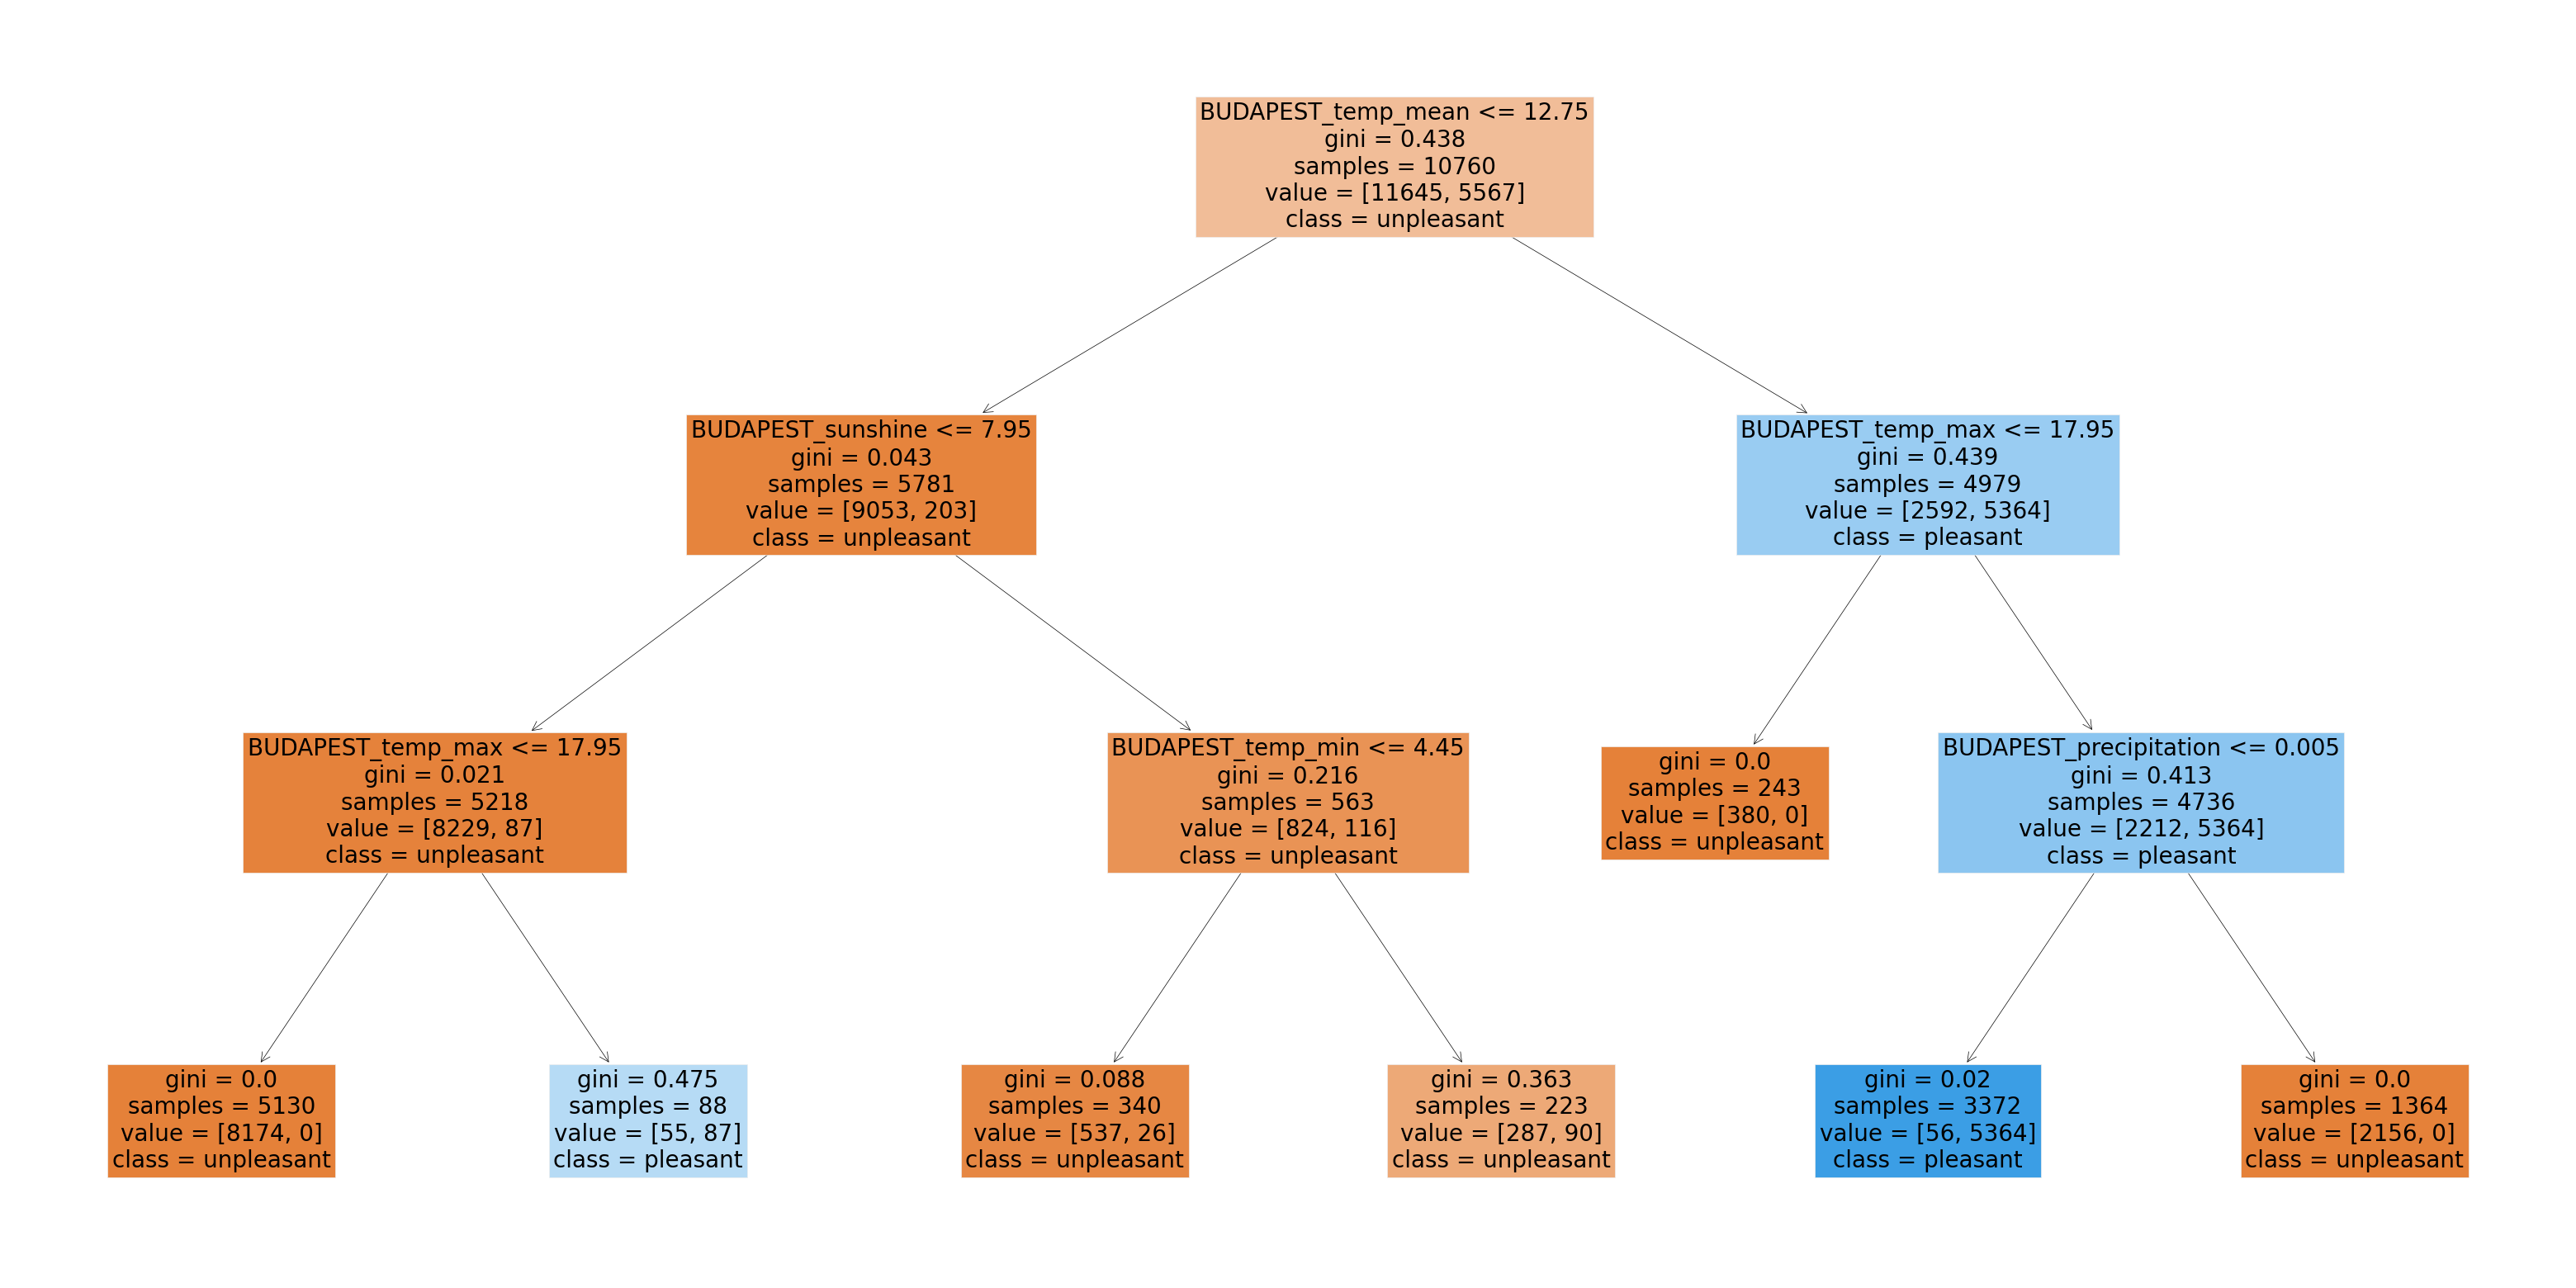

In [114]:
# Plot random forest (Budapest)
fig_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

fig_4.savefig(f"{path}/random_forest_Budepest.png")

**List Feature Importances**

In [115]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.00942975 0.0036828  0.00142686 0.08605507 0.22423813 0.06421529
 0.21526333 0.09971373 0.29597505]
(9,)


In [116]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [117]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.295975
4     precipitation    0.224238
6         temp_mean    0.215263
7          temp_min    0.099714
3  global_radiation    0.086055
5          sunshine    0.064215
0       cloud_cover    0.009430
1          humidity    0.003683
2          pressure    0.001427


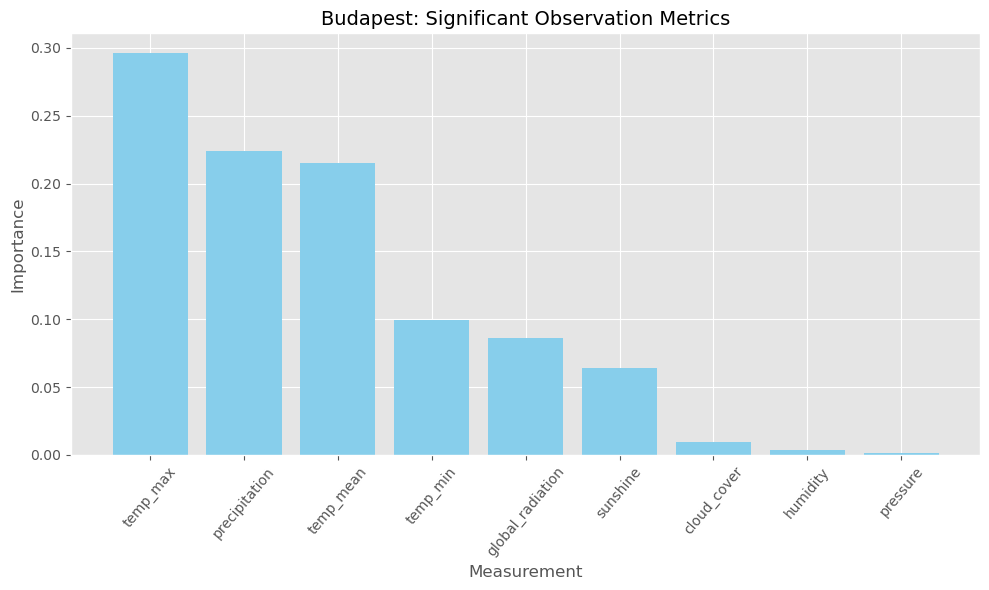

In [118]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()


plt_4.savefig(f"{path}/feature_importance_bar_Budapest.png")

#### The most important indicators for Budapest are 1) temp_max, 2)precipitation, 3)temp_mean 

## c) Ljubljana¶

**Processing the data for Ljubljana**

In [119]:
# Filter weather dataset to only include Budapest
df_ljublijana = unscaled[unscaled.columns[unscaled.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
df_ljublijana.head(1)

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                 1.0              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                         0.2                      0.0                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  
0                 -0.6                -1.9                 0.5

In [120]:
# Filter pleasant dataset to only include Ljubljana
ljublijana_answers = answers[answers.columns[answers.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
ljublijana_answers.head(1)



LJUBLJANA_pleasant_weather
0                           0

In [122]:
# Check shape
print(df_ljublijana.shape)
print(ljublijana_answers.shape)

(22950, 9)
(22950, 1)


In [123]:
# Create matrices
y_5 = ljublijana_answers.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [124]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [125]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [126]:
# Create X matrix
X_5 = df_ljublijana.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [127]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Create a Random Forest for Ljubljana**

In [128]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [129]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9989543394911119


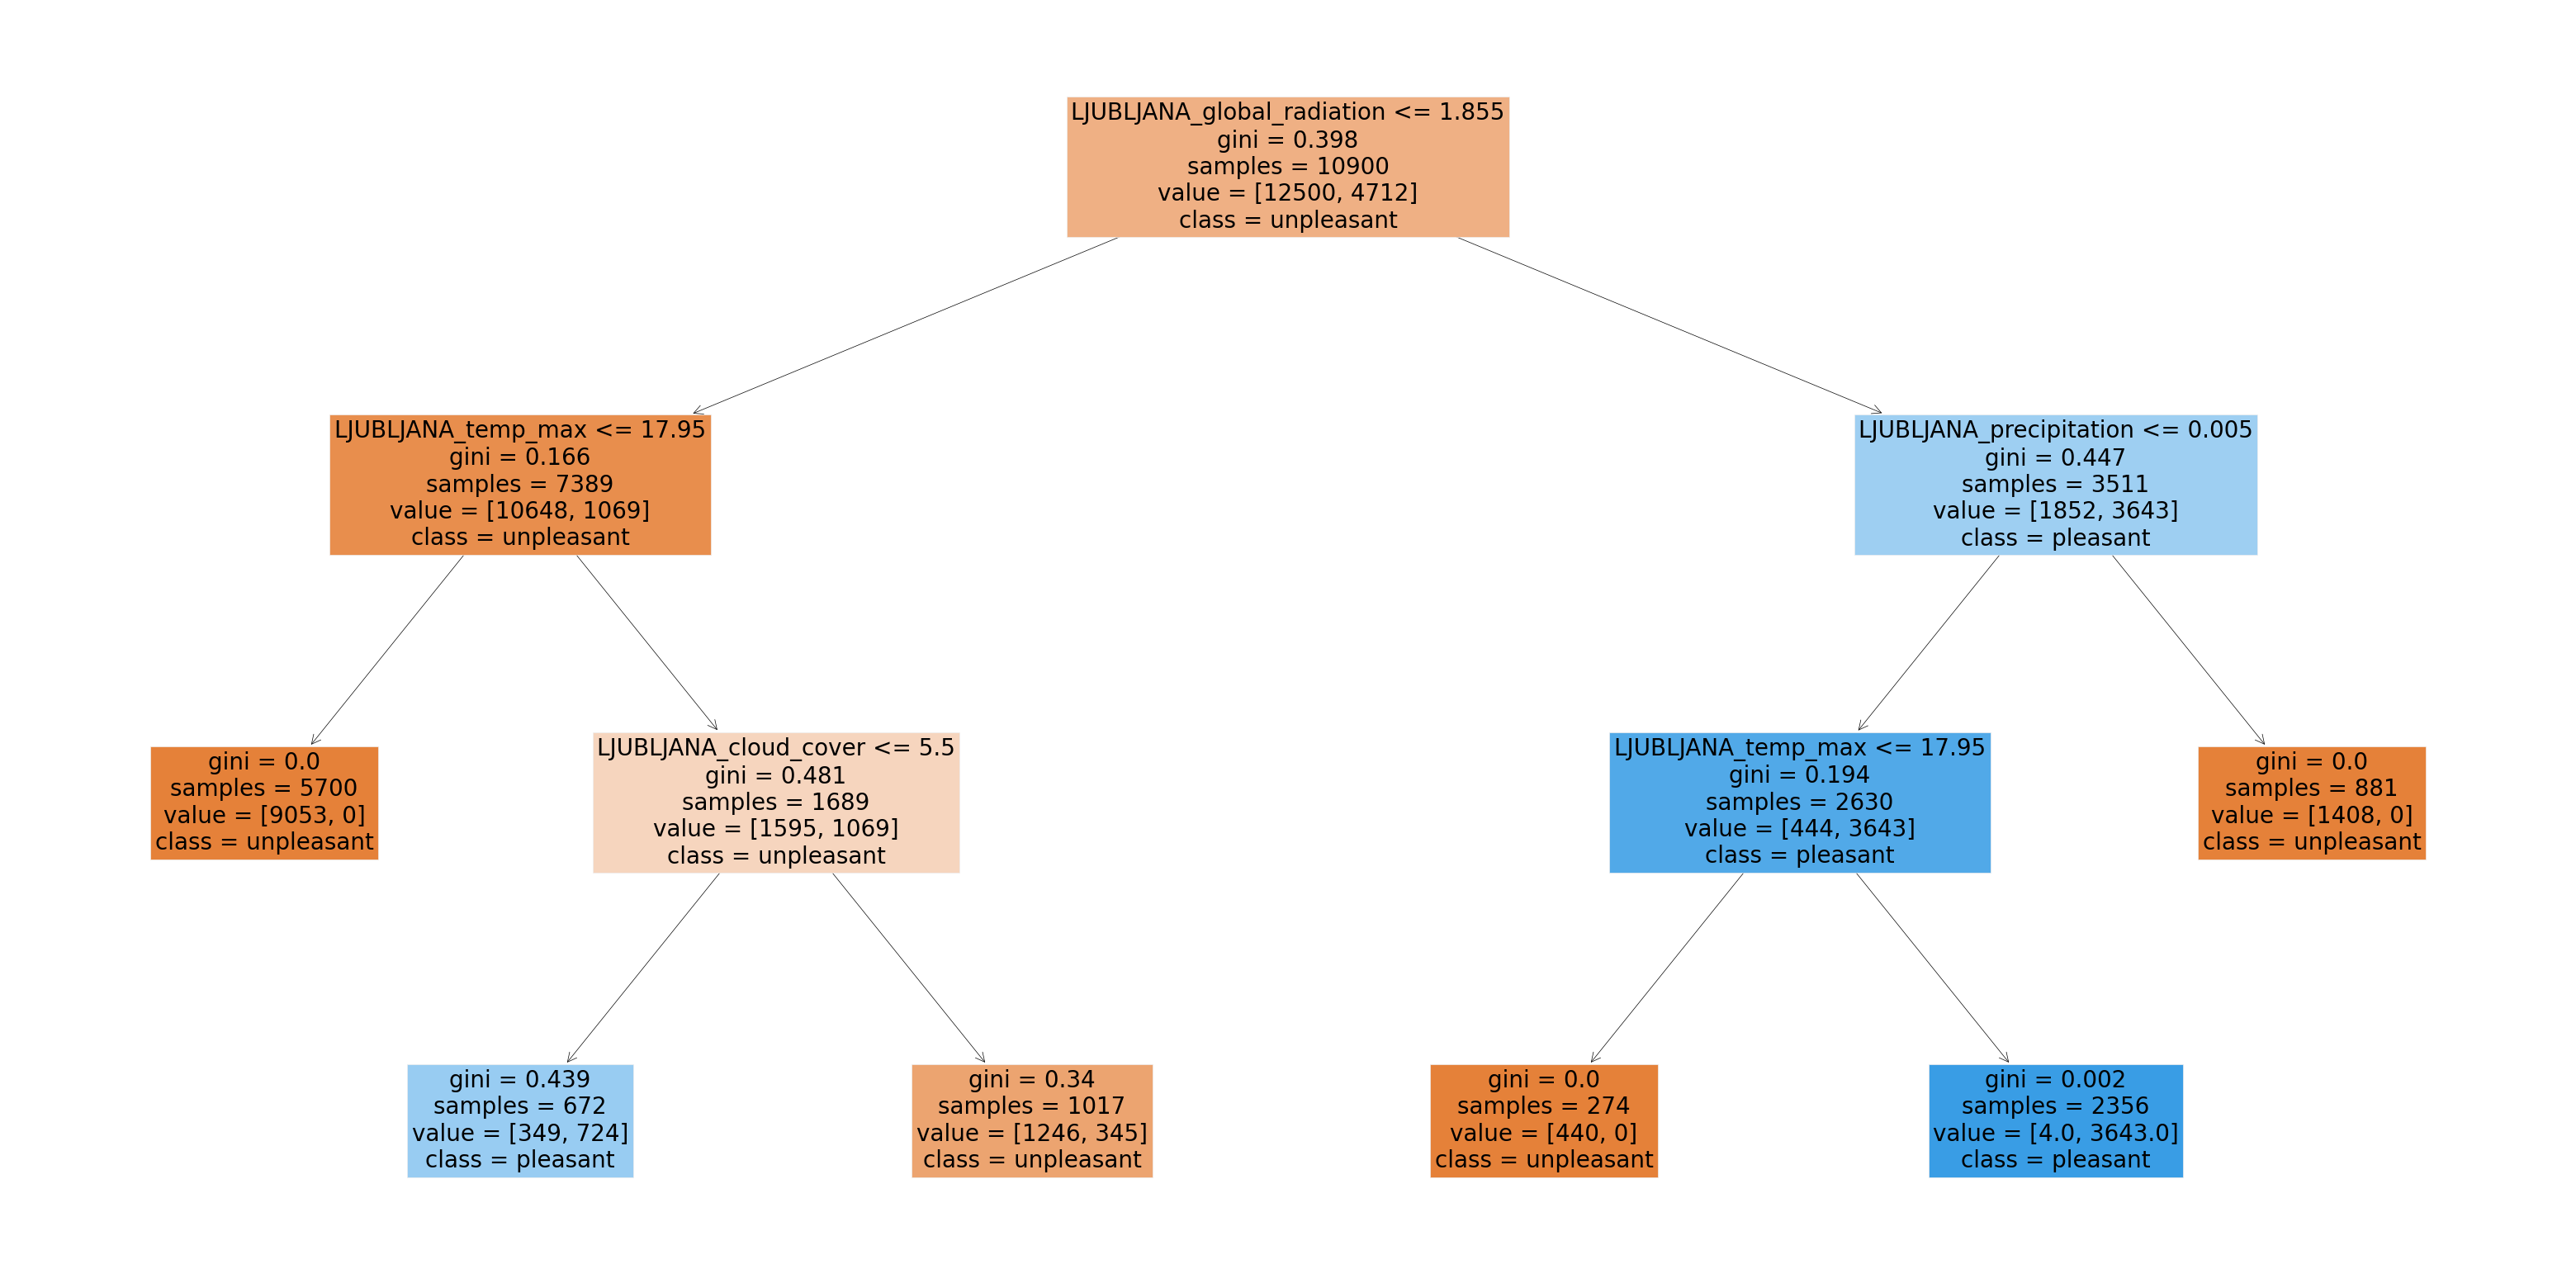

In [130]:
# Plot random forest (Ljubljana)
fig_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_ljublijana.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();


fig_5.savefig(f"{path}/random_forest_Lublijana.png")

**List Feature Importances**

In [131]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.05668932 0.02180585 0.00232097 0.14651509 0.25551029 0.08297089
 0.14711743 0.02282951 0.26424066]
(9,)


In [132]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [133]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
8          temp_max    0.264241
4     precipitation    0.255510
6         temp_mean    0.147117
3  global_radiation    0.146515
5          sunshine    0.082971
0       cloud_cover    0.056689
7          temp_min    0.022830
1          humidity    0.021806
2          pressure    0.002321


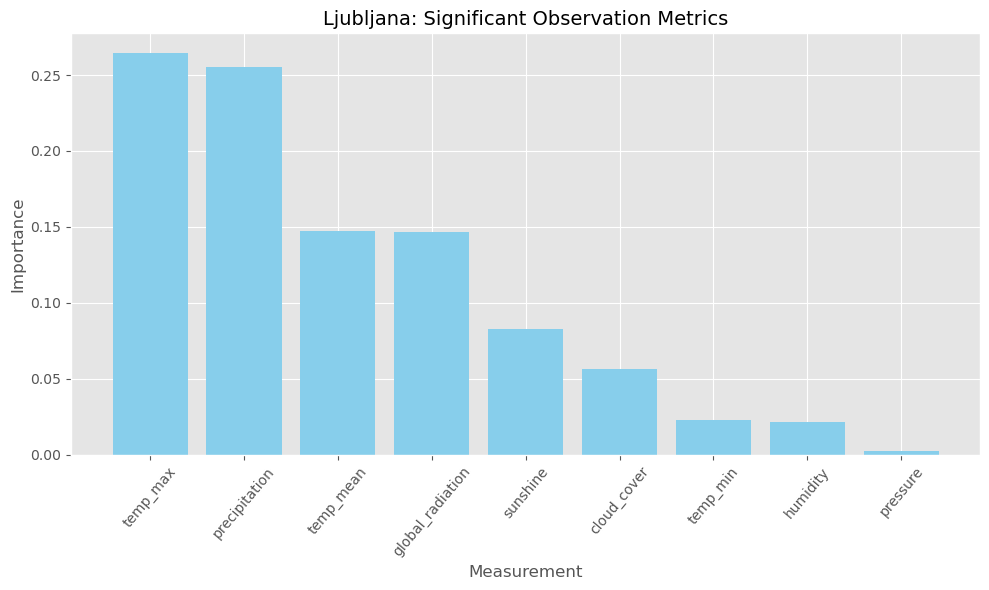

In [134]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()


plt_5.savefig(f"{path}/feature_importance_bar_Lublijana.png")

#### The most important indicators for Lublijana are 1) temp_max, 2)precipitation, 3)temp_mean ties with global_radiation